In [16]:
%pip install scikit-learn
%pip install sqlite3
%pip install statsmodels
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3

[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [5]:
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(20,10)})

In [6]:
data = pd.read_csv("Water_Consumption_city_N.csv")
data

,date,year,month,day,day_of_week,is_weekend,is_holiday,avg_temperature,min_temperature,max_temperature,precipitation,humidity,wind_speed,population,water_price,tourism_index,industrial_water_use,water_restrictions,uv_index,number_of_tourists,construction_index,economic_index,water_main_breaks,reservoir_level,pool_opening_season,garden_watering_season,smart_meter_coverage,water_consumption_tonnes
0,2019-01-01,2019,1,1,Tuesday,0,1,-12.5,-16.2,-8.1,2.3,85,4.2,548200,42.3,45,30500,0,1,3800,28,92.1,2,78.5,0,0,15.2,192500
1,2019-01-15,2019,1,15,Tuesday,0,0,-8.5,-12.2,-4.3,1.2,80,4.5,548300,42.3,12,31000,0,1,800,29,92.8,1,79.2,0,0,16.2,208000
2,2019-02-01,2019,2,1,Friday,0,0,-7.2,-11.0,-3.2,2.8,82,4.8,548400,42.3,15,30000,0,2,1100,30,93.0,0,79.8,0,0,16.8,205000
3,2019-02-10,2019,2,10,Sunday,1,0,-5.2,-9.1,-1.8,3.5,78,5.2,548500,42.3,20,29500,0,2,1500,32,93.2,0,80.5,0,0,17.5,198000
4,2019-03-01,2019,3,1,Friday,0,0,-4.5,-8.2,-0.8,3.2,80,4.5,548700,42.3,25,29000,0,3,2200,33,93.5,0,81.2,0,0,18.2,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2023-01-01,2023,1,1,Sunday,1,1,-5.5,-9.2,-1.5,3.8,83,6.5,556500,45.8,60,8800,0,2,5200,43,118.6,3,83.8,0,0,79.2,188000
92,2023-02-01,2023,2,1,Wednesday,0,0,-2.8,-6.2,0.8,4.8,82,6.8,556600,45.8,28,26500,0,3,1800,45,119.8,1,84.8,0,0,80.5,180000
93,2023-02-28,2023,2,28,Tuesday,0,0,-1.2,-4.8,2.8,5.2,82,7.5,556800,45.8,25,26800,0,3,1500,48,120.8,1,85.5,0,0,81.2,175000
94,2023-03-01,2023,3,1,Wednesday,0,0,4.5,0.8,8.8,5.8,78,6.0,556900,45.8,35,25500,0,4,2200,50,121.2,0,86.8,0,0,82.0,190000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      96 non-null     object 
 1   year                      96 non-null     int64  
 2   month                     96 non-null     int64  
 3   day                       96 non-null     int64  
 4   day_of_week               96 non-null     object 
 5   is_weekend                96 non-null     int64  
 6   is_holiday                96 non-null     int64  
 7   avg_temperature           96 non-null     float64
 8   min_temperature           96 non-null     float64
 9   max_temperature           96 non-null     float64
 10  precipitation             96 non-null     float64
 11  humidity                  96 non-null     int64  
 12  wind_speed                96 non-null     float64
 13  population                96 non-null     int64  
 14  water_price 

In [8]:
data.describe()

,year,month,day,is_weekend,is_holiday,avg_temperature,min_temperature,max_temperature,precipitation,humidity,wind_speed,population,water_price,tourism_index,industrial_water_use,water_restrictions,uv_index,number_of_tourists,construction_index,economic_index,water_main_breaks,reservoir_level,pool_opening_season,garden_watering_season,smart_meter_coverage,water_consumption_tonnes
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000
mean,2020.614583,6.531250,9.291667,0.291667,0.104167,10.894792,6.407292,15.768750,5.317708,75.687500,5.481250,552749.479167,44.633333,48.947917,23518.750000,0.052083,4.375000,5164.583333,50.697917,96.203125,0.937500,87.006250,0.250000,0.40625,47.671875,205719.604167
std,1.242830,3.457876,10.364836,0.456916,0.307080,12.084835,11.403150,12.724939,4.172491,9.689183,1.596068,2317.558774,1.658577,24.777056,6736.300914,0.223361,2.276886,4067.741625,11.255052,12.641240,1.203613,3.322485,0.435286,0.49371,19.838839,27334.296373
min,2019.000000,1.000000,1.000000,0.000000,0.000000,-12.500000,-16.200000,-8.100000,0.000000,50.000000,1.500000,548200.000000,42.300000,12.000000,8800.000000,0.000000,1.000000,800.000000,28.000000,72.500000,0.000000,78.500000,0.000000,0.00000,15.200000,168000.000000
25%,2019.750000,3.000000,1.000000,0.000000,0.000000,0.300000,-3.300000,4.300000,2.725000,72.000000,4.425000,551000.000000,42.300000,28.000000,19250.000000,0.000000,2.750000,2200.000000,42.000000,89.950000,0.000000,84.800000,0.000000,0.00000,28.600000,188000.000000
50%,2021.000000,7.000000,1.000000,0.000000,0.000000,11.000000,6.850000,15.800000,5.000000,79.500000,5.800000,552450.000000,45.800000,43.500000,26800.000000,0.000000,4.000000,3800.000000,49.000000,96.550000,1.000000,86.800000,0.000000,0.00000,45.150000,198000.000000
75%,2022.000000,9.250000,15.750000,1.000000,0.000000,21.350000,16.500000,26.800000,7.800000,82.000000,6.500000,554350.000000,45.800000,65.000000,28200.000000,0.000000,6.000000,6850.000000,58.500000,105.350000,1.000000,89.275000,0.250000,1.00000,64.450000,215000.000000
max,2023.000000,12.000000,31.000000,1.000000,1.000000,32.500000,26.800000,38.200000,22.800000,90.000000,9.200000,557000.000000,45.800000,115.000000,31000.000000,1.000000,10.000000,18200.000000,78.000000,122.200000,6.000000,93.500000,1.000000,1.00000,83.000000,285000.000000


date – дата

year – год

month – месяц

day – день

day_of_week – день недели

is_weekend – является выходным днем (0-нет, 1-да)

is_holiday – является праздничным днем (0-нет, 1-да)

avg_temperature – средняя температура

min_temperature – минимальная температура

max_temperature – максимальная температура

precipitation – осадки

humidity – влажность

wind_speed – скорость ветра

population – население

water_price – цена на воду

tourism_index – индекс туризма

industrial_water_use – промышленное водопользование

water_restrictions – ограничения на воду (0-нет, 1-да)

uv_index – УФ-индекс

number_of_tourists – количество туристов

construction_index – строительный индекс

economic_index – экономический индекс

water_main_breaks – прорывы водопроводных магистралей

reservoir_level – уровень водохранилища

pool_opening_season – сезон открытия бассейнов (0-нет, 1-да)

garden_watering_season – сезон полива садов (0-нет, 1-да)

smart_meter_coverage – охват умными счетчиками

water_consumption_tonnes – потребление воды (в тоннах)

ПОСТРОЕНИЕ ГРАФИКА ВРЕМЕННОГО РЯДА 

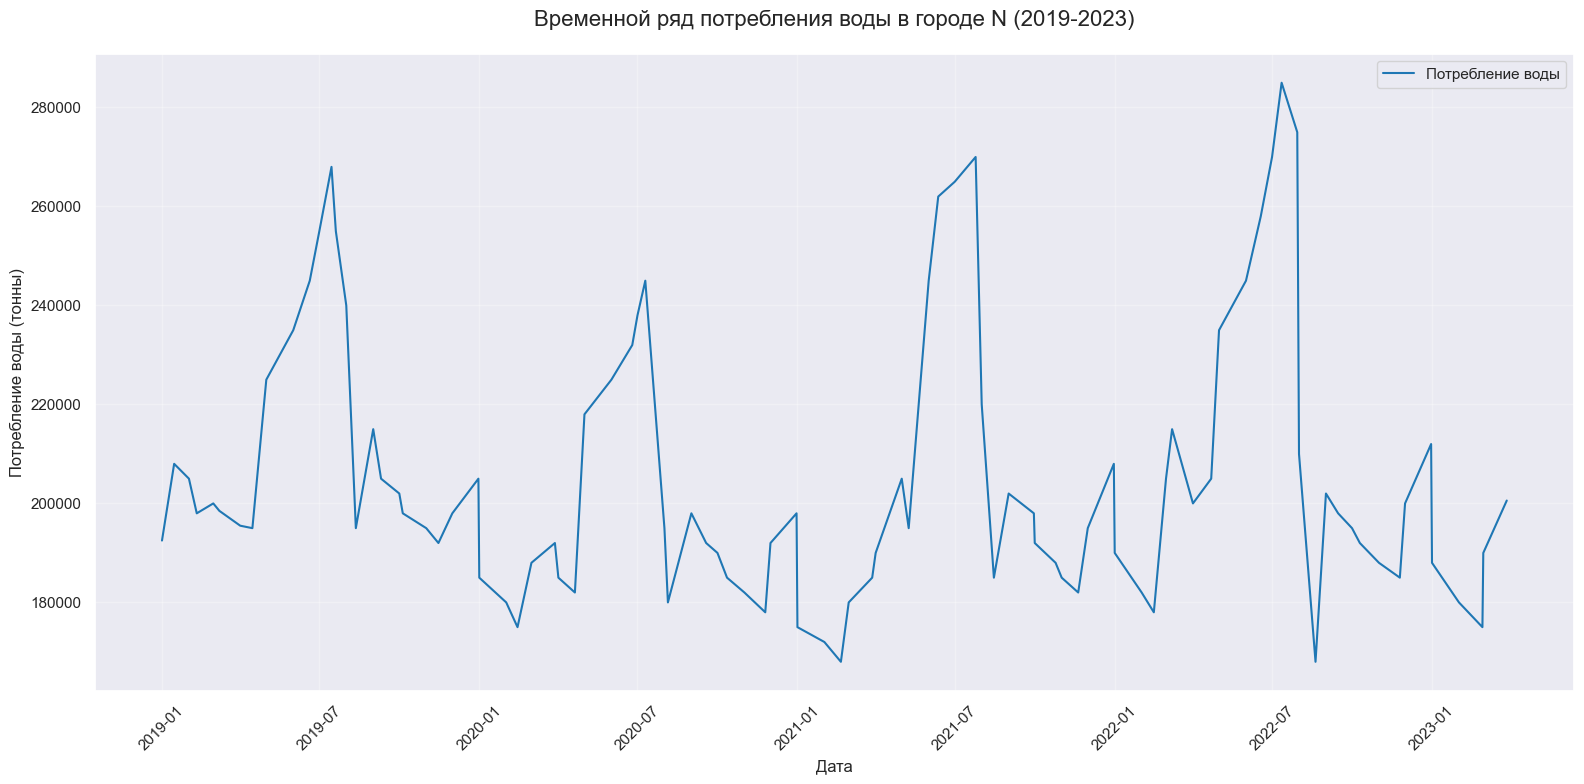

In [11]:
# Загрузка и подготовка данных
df = pd.read_csv('Water_Consumption_city_N.csv')
df['date'] = pd.to_datetime(df['date'])

# Построение графика
plt.figure(figsize=(16, 8))
plt.plot(df['date'], df['water_consumption_tonnes'], 
         color='#1f77b4', linewidth=1.5, label='Потребление воды')

plt.title('Временной ряд потребления воды в городе N (2019-2023)', fontsize=16, pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Потребление воды (тонны)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# Добавляем поворот дат для лучшей читаемости
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ТРЕНД, СЕЗОННОСТЬ, ОСТАТОК

Тренд - долгосрочное направление изменения потребления

Сезонность - повторяющиеся годовые циклы

Остатки - случайные колебания, не объяснённые трендом и сезонностью

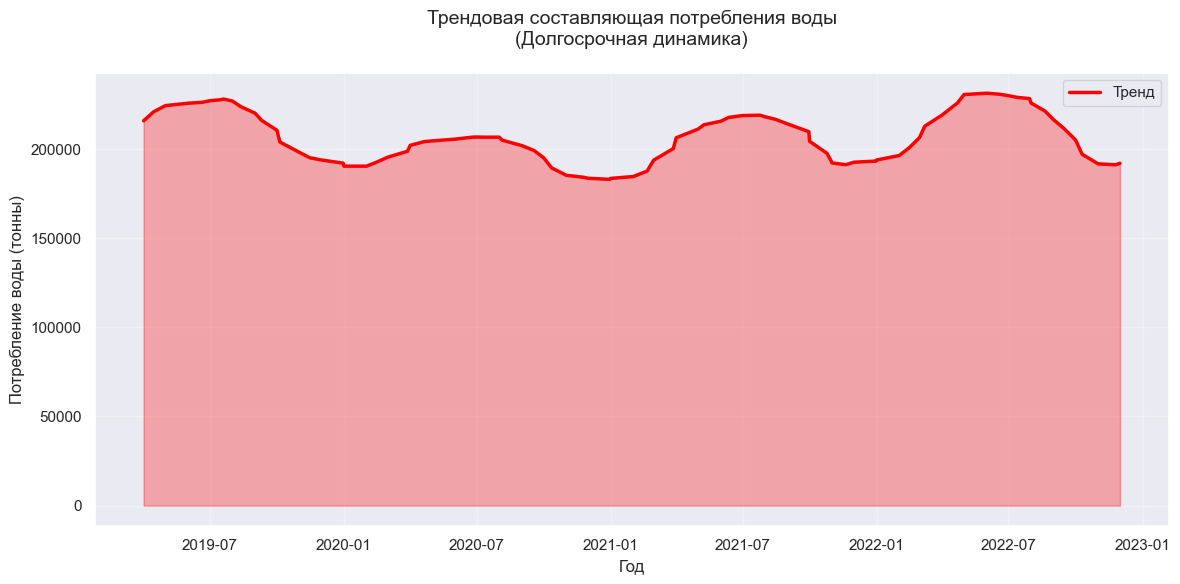

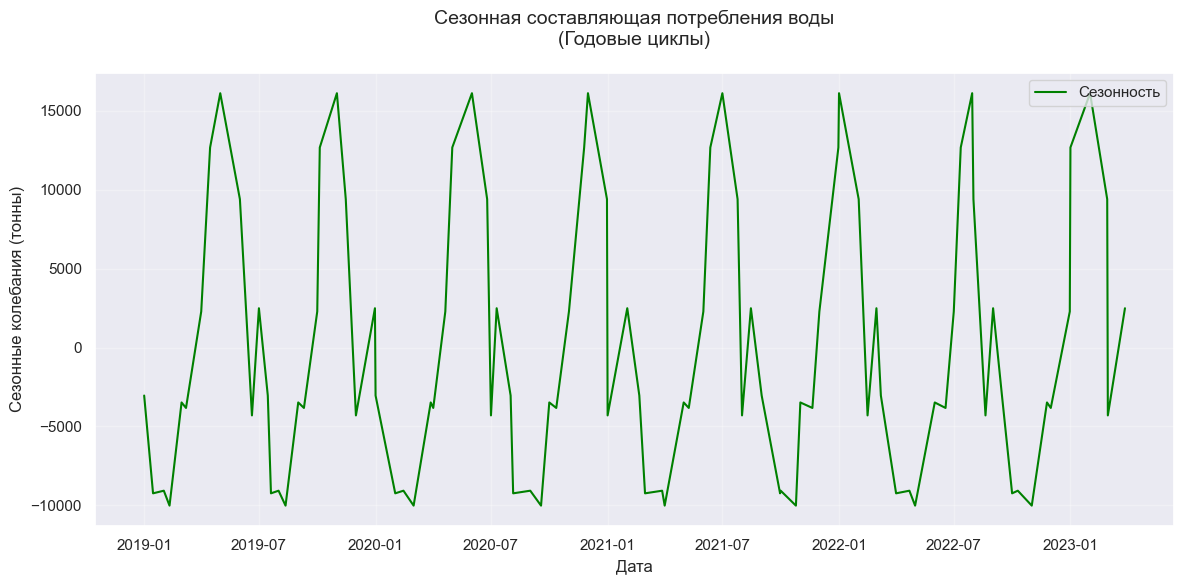

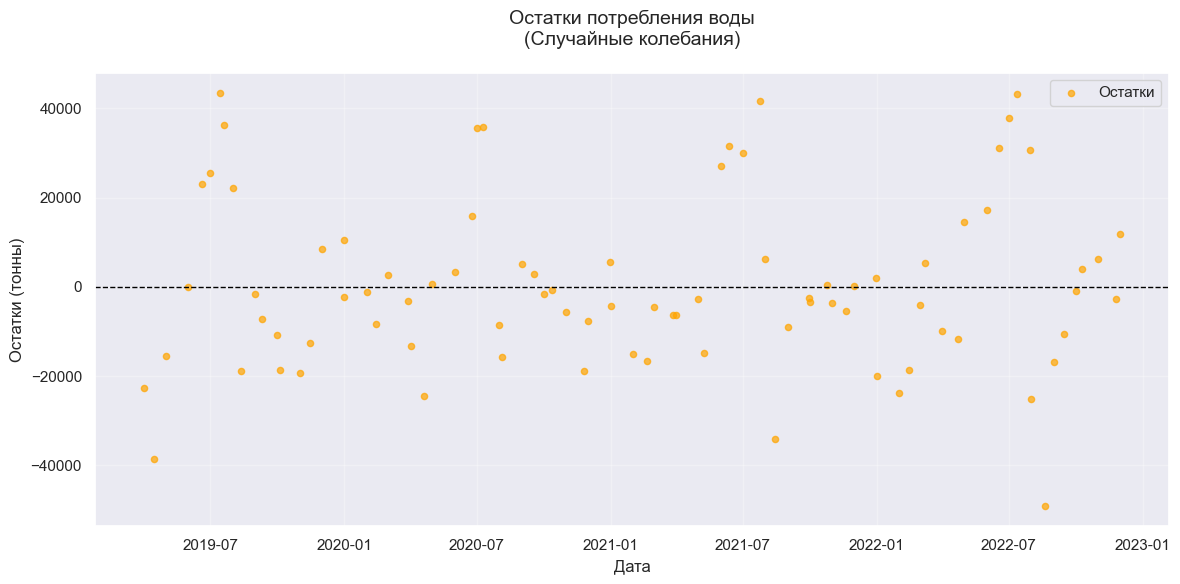

СТАТИСТИЧЕСКАЯ ИНФОРМАЦИЯ ПО КОМПОНЕНТАМ:
Тренд - среднее: 206948 тонн
Сезонность - амплитуда: 26149 тонн
Остатки - стандартное отклонение: 19234 тонн


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Загрузка и подготовка данных
df = pd.read_csv('Water_Consumption_city_N.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df.set_index('date', inplace=True)

# Декомпозиция
decomposition = seasonal_decompose(df['water_consumption_tonnes'], 
                                model='additive', 
                                period=12)

# ТРЕНД - отдельный график
plt.figure(figsize=(12, 6))
plt.plot(decomposition.trend.index, decomposition.trend.values, 
         color='red', linewidth=2.5, label='Тренд')
plt.fill_between(decomposition.trend.index, 
                decomposition.trend.values, 
                alpha=0.3, color='red')
plt.title('Трендовая составляющая потребления воды\n(Долгосрочная динамика)', 
          fontsize=14, pad=20)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Потребление воды (тонны)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# СЕЗОННОСТЬ - отдельный график
plt.figure(figsize=(12, 6))
plt.plot(decomposition.seasonal.index, decomposition.seasonal.values, 
         color='green', linewidth=1.5, label='Сезонность')
plt.title('Сезонная составляющая потребления воды\n(Годовые циклы)', 
          fontsize=14, pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Сезонные колебания (тонны)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# ОСТАТКИ - отдельный график
plt.figure(figsize=(12, 6))
plt.scatter(decomposition.resid.index, decomposition.resid.values, 
           color='orange', alpha=0.7, s=20, label='Остатки')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Остатки потребления воды\n(Случайные колебания)', 
          fontsize=14, pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Остатки (тонны)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Вывод статистической информации
print("=" * 50)
print("СТАТИСТИЧЕСКАЯ ИНФОРМАЦИЯ ПО КОМПОНЕНТАМ:")
print("=" * 50)
print(f"Тренд - среднее: {decomposition.trend.mean():.0f} тонн")
print(f"Сезонность - амплитуда: {decomposition.seasonal.max()-decomposition.seasonal.min():.0f} тонн")
print(f"Остатки - стандартное отклонение: {decomposition.resid.std():.0f} тонн")

КОРРЕЛЯЦИЯ ДАННЫХ 

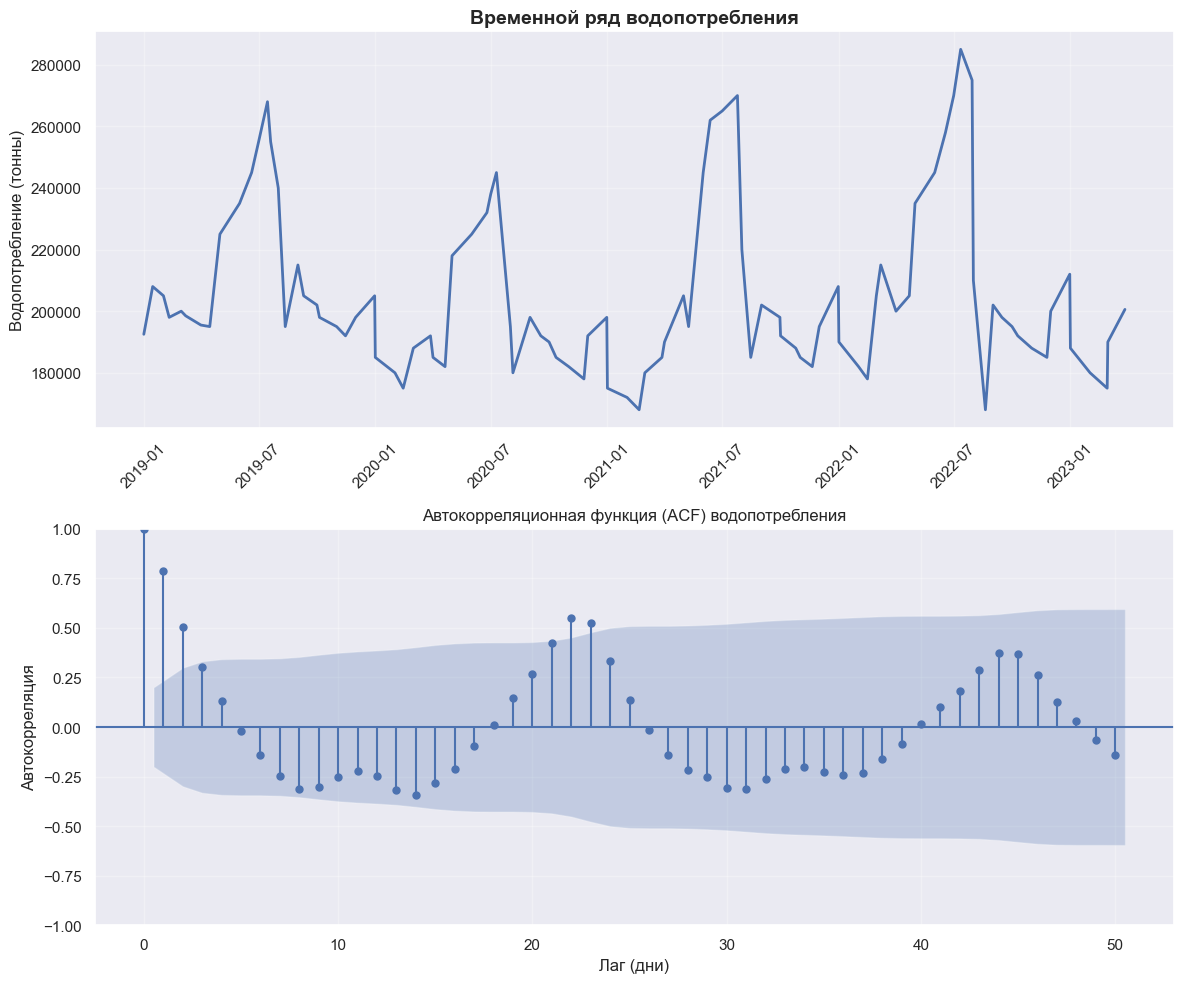


Значения автокорреляции:
Лаг 0: 1.0000
Лаг 1: 0.7851
Лаг 2: 0.5071
Лаг 3: 0.3017
Лаг 4: 0.1319
Лаг 5: -0.0190
Лаг 6: -0.1410
Лаг 7: -0.2475
Лаг 8: -0.3132
Лаг 9: -0.3021
Лаг 10: -0.2530

Анализ сезонности:


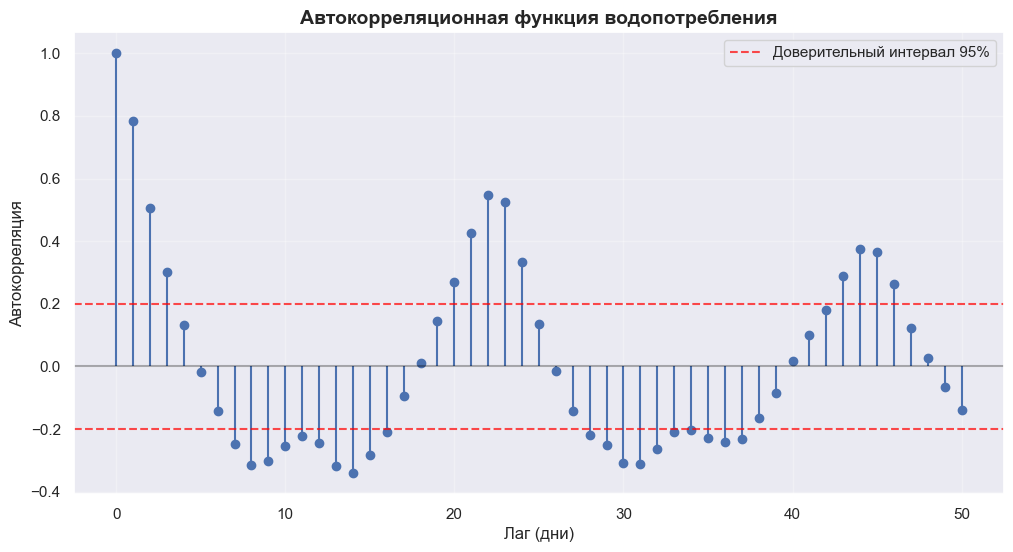


Статистическая информация:
Период анализа: 2019-01-01 - 2023-03-28
Количество наблюдений: 96
Среднее водопотребление: 205719.60 тонн
Стандартное отклонение: 27334.30 тонн


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

# Загрузка данных
df = pd.read_csv('Water_Consumption_city_N.csv')

# Преобразование даты в индекс временного ряда
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Сортировка по дате на всякий случай
df.sort_index(inplace=True)

# Вычисление автокорреляции
water_consumption = df['water_consumption_tonnes']
lags = 50  # количество лагов для анализа

# Вычисление ACF
autocorr = acf(water_consumption, nlags=lags, fft=True)

# Построение графиков
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# График 1: Исходный временной ряд
ax1.plot(water_consumption.index, water_consumption.values, linewidth=2)
ax1.set_title('Временной ряд водопотребления', fontsize=14, fontweight='bold')
ax1.set_ylabel('Водопотребление (тонны)')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# График 2: Автокорреляционная функция (ACF)
plot_acf(water_consumption, ax=ax2, lags=lags, alpha=0.05, 
         title='Автокорреляционная функция (ACF) водопотребления')
ax2.set_xlabel('Лаг (дни)')
ax2.set_ylabel('Автокорреляция')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнительный анализ: таблица с значениями автокорреляции
print("\nЗначения автокорреляции:")
print("=" * 50)
for lag in range(0, min(11, lags + 1)):
    print(f"Лаг {lag}: {autocorr[lag]:.4f}")

# Анализ сезонности (годовая автокорреляция)
print("\n" + "=" * 50)
print("Анализ сезонности:")
print("=" * 50)
year_lags = [365, 730]  # лаги для 1 и 2 лет
for year_lag in year_lags:
    if year_lag <= lags:
        print(f"Автокорреляция с лагом {year_lag} дней (~{year_lag//365} год): {autocorr[year_lag]:.4f}")

# Дополнительный график с использованием seaborn для лучшей визуализации
plt.figure(figsize=(12, 6))
lags_range = range(lags + 1)
plt.stem(lags_range, autocorr, basefmt=" ")
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
# Добавляем доверительный интервал 95%
conf_int = 1.96 / np.sqrt(len(water_consumption))
plt.axhline(y=conf_int, color='red', linestyle='--', alpha=0.7, label='Доверительный интервал 95%')
plt.axhline(y=-conf_int, color='red', linestyle='--', alpha=0.7)
plt.title('Автокорреляционная функция водопотребления', fontsize=14, fontweight='bold')
plt.xlabel('Лаг (дни)')
plt.ylabel('Автокорреляция')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Вывод статистической информации
print("\n" + "=" * 50)
print("Статистическая информация:")
print("=" * 50)
print(f"Период анализа: {water_consumption.index[0].date()} - {water_consumption.index[-1].date()}")
print(f"Количество наблюдений: {len(water_consumption)}")
print(f"Среднее водопотребление: {water_consumption.mean():.2f} тонн")
print(f"Стандартное отклонение: {water_consumption.std():.2f} тонн")

ПОСТРОЕНИЕ МАТРИЦ КОРРЕЛЯЦИЙ С МЕТРИКАМИ ПИРСОНА (ЛИНЕЙНЫЕ ЗАВИСИМОСТИ) И СПИРМЕНА (МОНОТОННЫЕ ЗАВИСИМОСТИ)

Матрица 1: Полная тепловая карта корреляции Пирсона

Матрица 2: Полная тепловая карта корреляции Спирмена

Матрица 3: Столбчатая диаграмма корреляций Пирсона с водопотреблением

Матрица 4: Столбчатая диаграмма корреляций Спирмена с водопотреблением

Матрица 5: Текстовая таблица топ-10 самых сильных корреляций

Матрица 6: Текстовая таблица сильных корреляций между переменными

Матрица 7: Scatter plots для топ-4 переменных

Числовые колонки для анализа (26):
 1. year
 2. month
 3. day
 4. is_weekend
 5. is_holiday
 6. avg_temperature
 7. min_temperature
 8. max_temperature
 9. precipitation
10. humidity
11. wind_speed
12. population
13. water_price
14. tourism_index
15. industrial_water_use
16. water_restrictions
17. uv_index
18. number_of_tourists
19. construction_index
20. economic_index
21. water_main_breaks
22. reservoir_level
23. pool_opening_season
24. garden_watering_season
25. smart_meter_coverage
26. water_consumption_tonnes


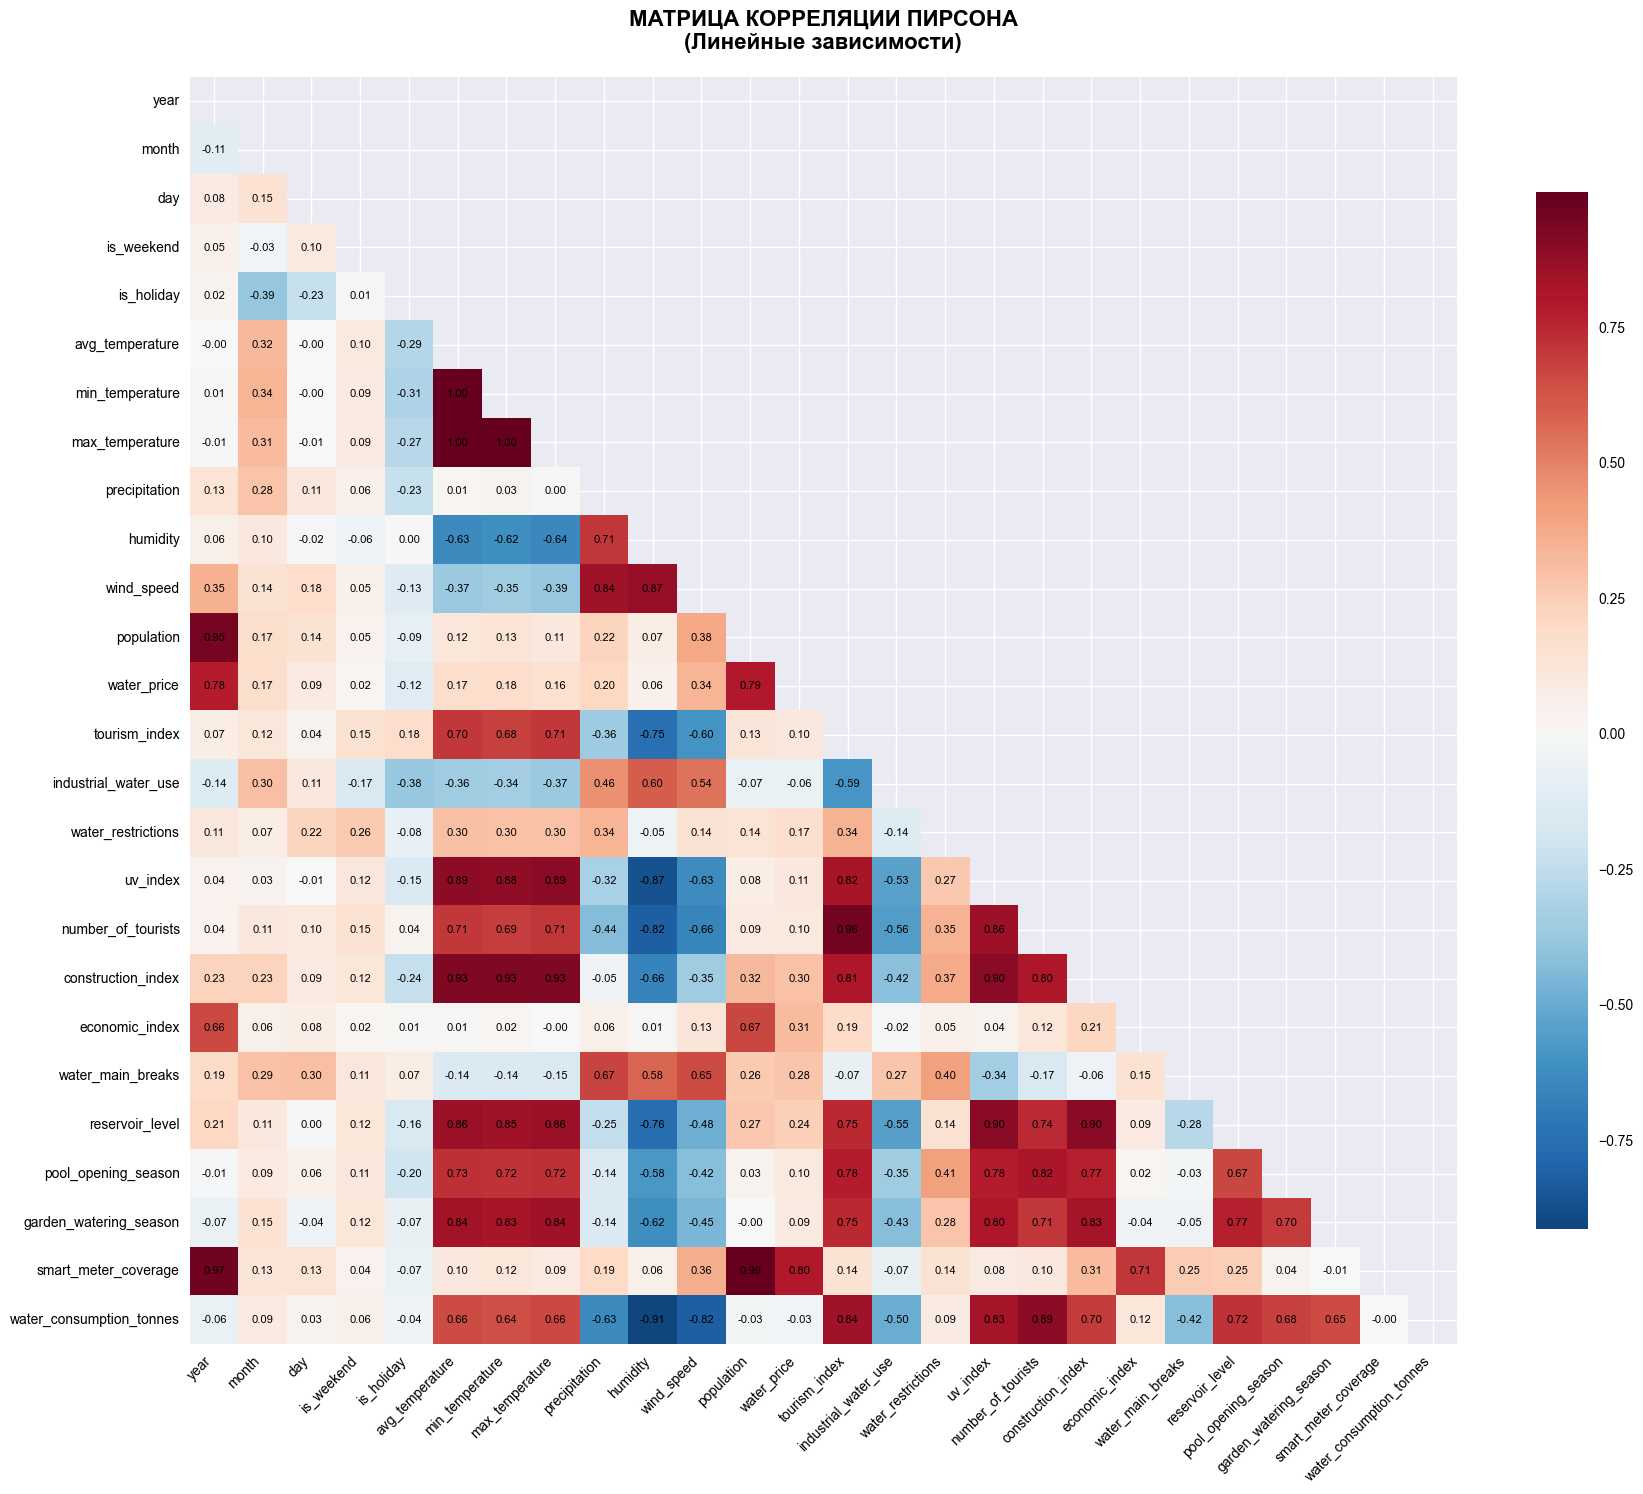

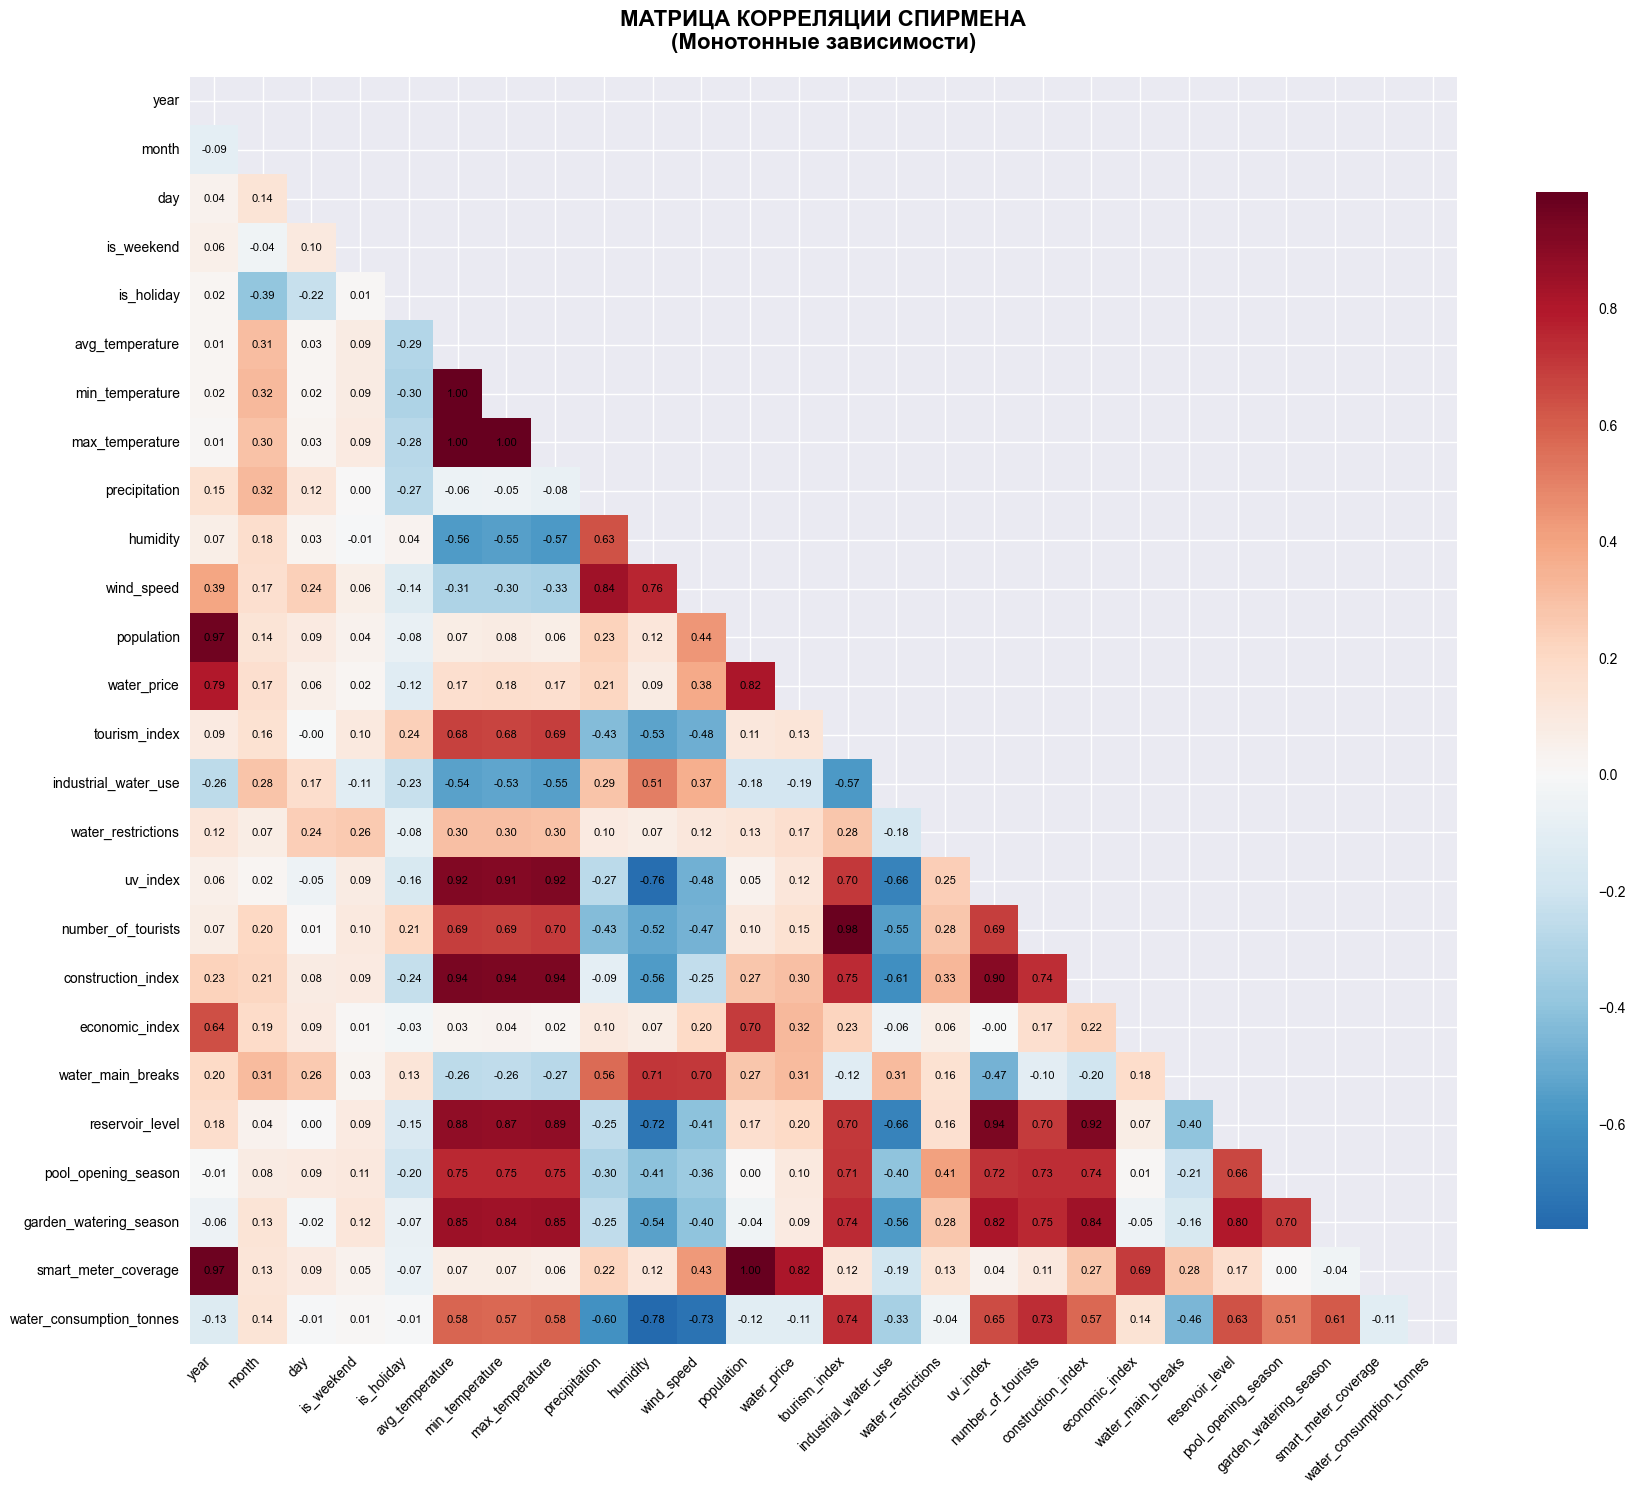

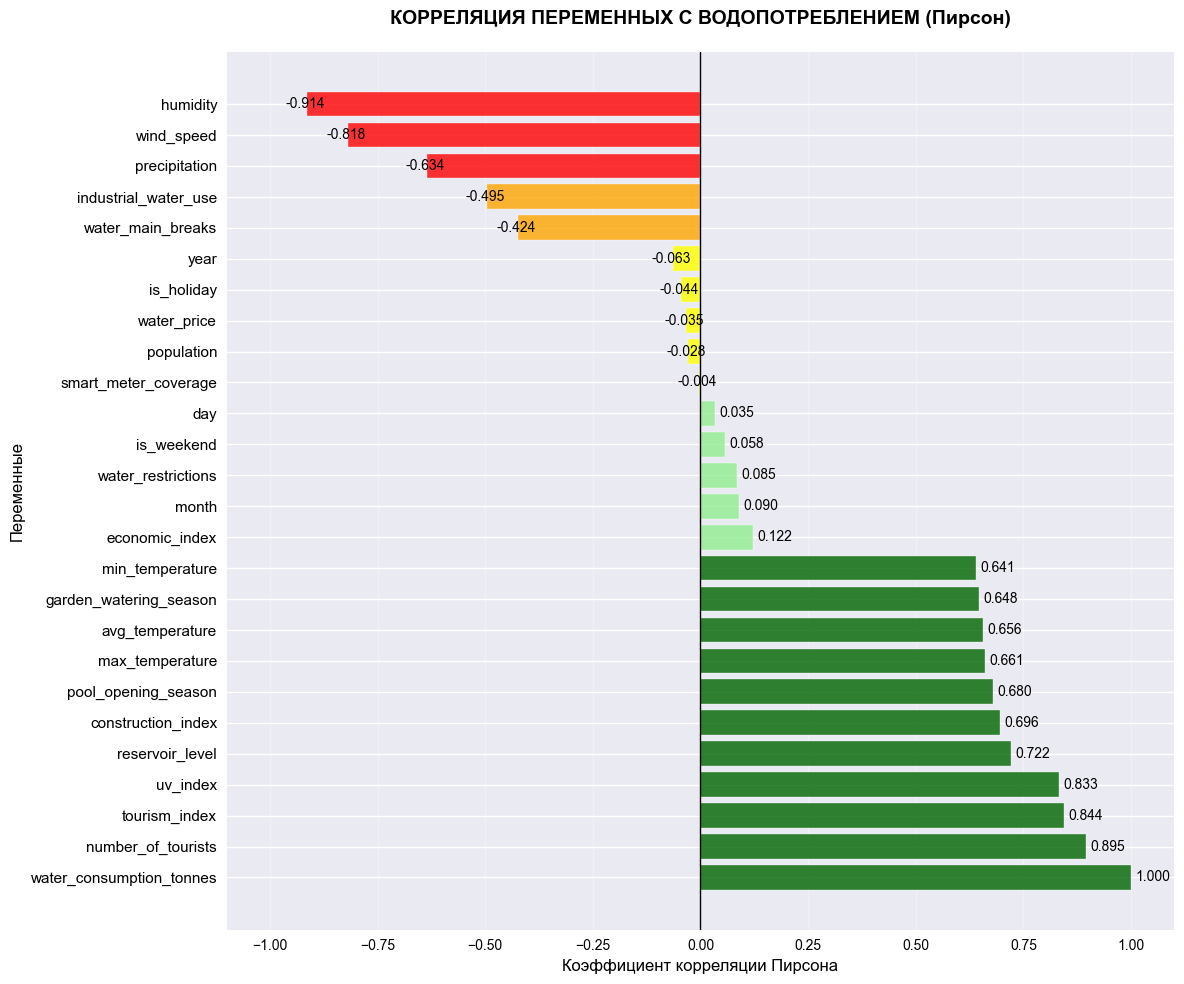

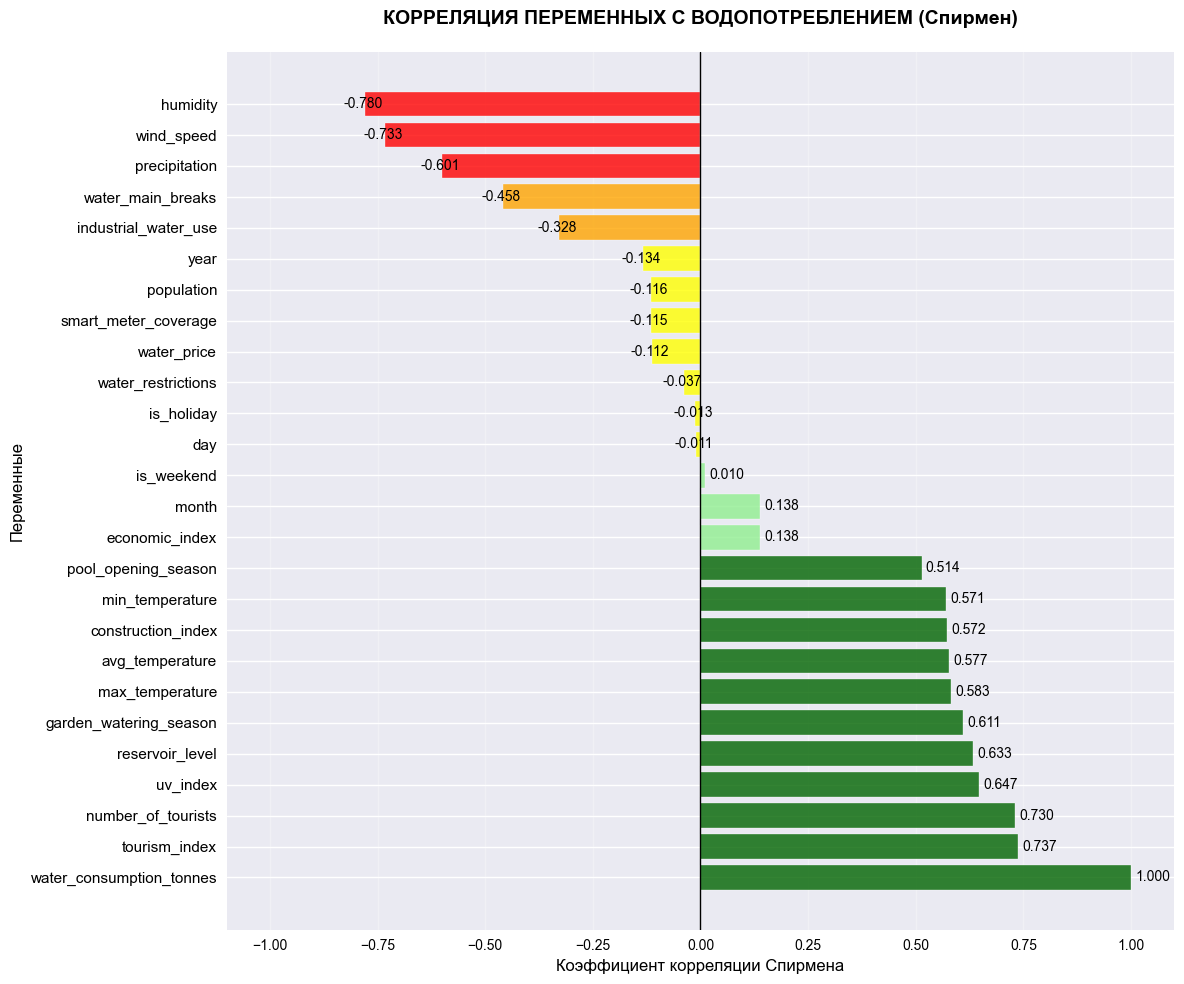


ТОП-10 САМЫХ СИЛЬНЫХ КОРРЕЛЯЦИЙ С ВОДОПОТРЕБЛЕНИЕМ

📍 МЕТОД ПИРСОНА (линейная корреляция):
------------------------------------------------------------
 1. water_consumption_tonnes  :  1.0000 | 💪 ОЧЕНЬ СИЛЬНАЯ | 📈 положительная
 2. humidity                  : -0.9143 | 💪 ОЧЕНЬ СИЛЬНАЯ | 📉 отрицательная
 3. number_of_tourists        :  0.8947 | 💪 ОЧЕНЬ СИЛЬНАЯ | 📈 положительная
 4. tourism_index             :  0.8436 | 💪 ОЧЕНЬ СИЛЬНАЯ | 📈 положительная
 5. uv_index                  :  0.8328 | 💪 ОЧЕНЬ СИЛЬНАЯ | 📈 положительная
 6. wind_speed                : -0.8184 | 💪 ОЧЕНЬ СИЛЬНАЯ | 📉 отрицательная
 7. reservoir_level           :  0.7218 | 💪 ОЧЕНЬ СИЛЬНАЯ | 📈 положительная
 8. construction_index        :  0.6955 | 🔶 СИЛЬНАЯ | 📈 положительная
 9. pool_opening_season       :  0.6801 | 🔶 СИЛЬНАЯ | 📈 положительная
10. max_temperature           :  0.6609 | 🔶 СИЛЬНАЯ | 📈 положительная

📍 МЕТОД СПИРМЕНА (ранговая корреляция):
------------------------------------------------------------
 1.

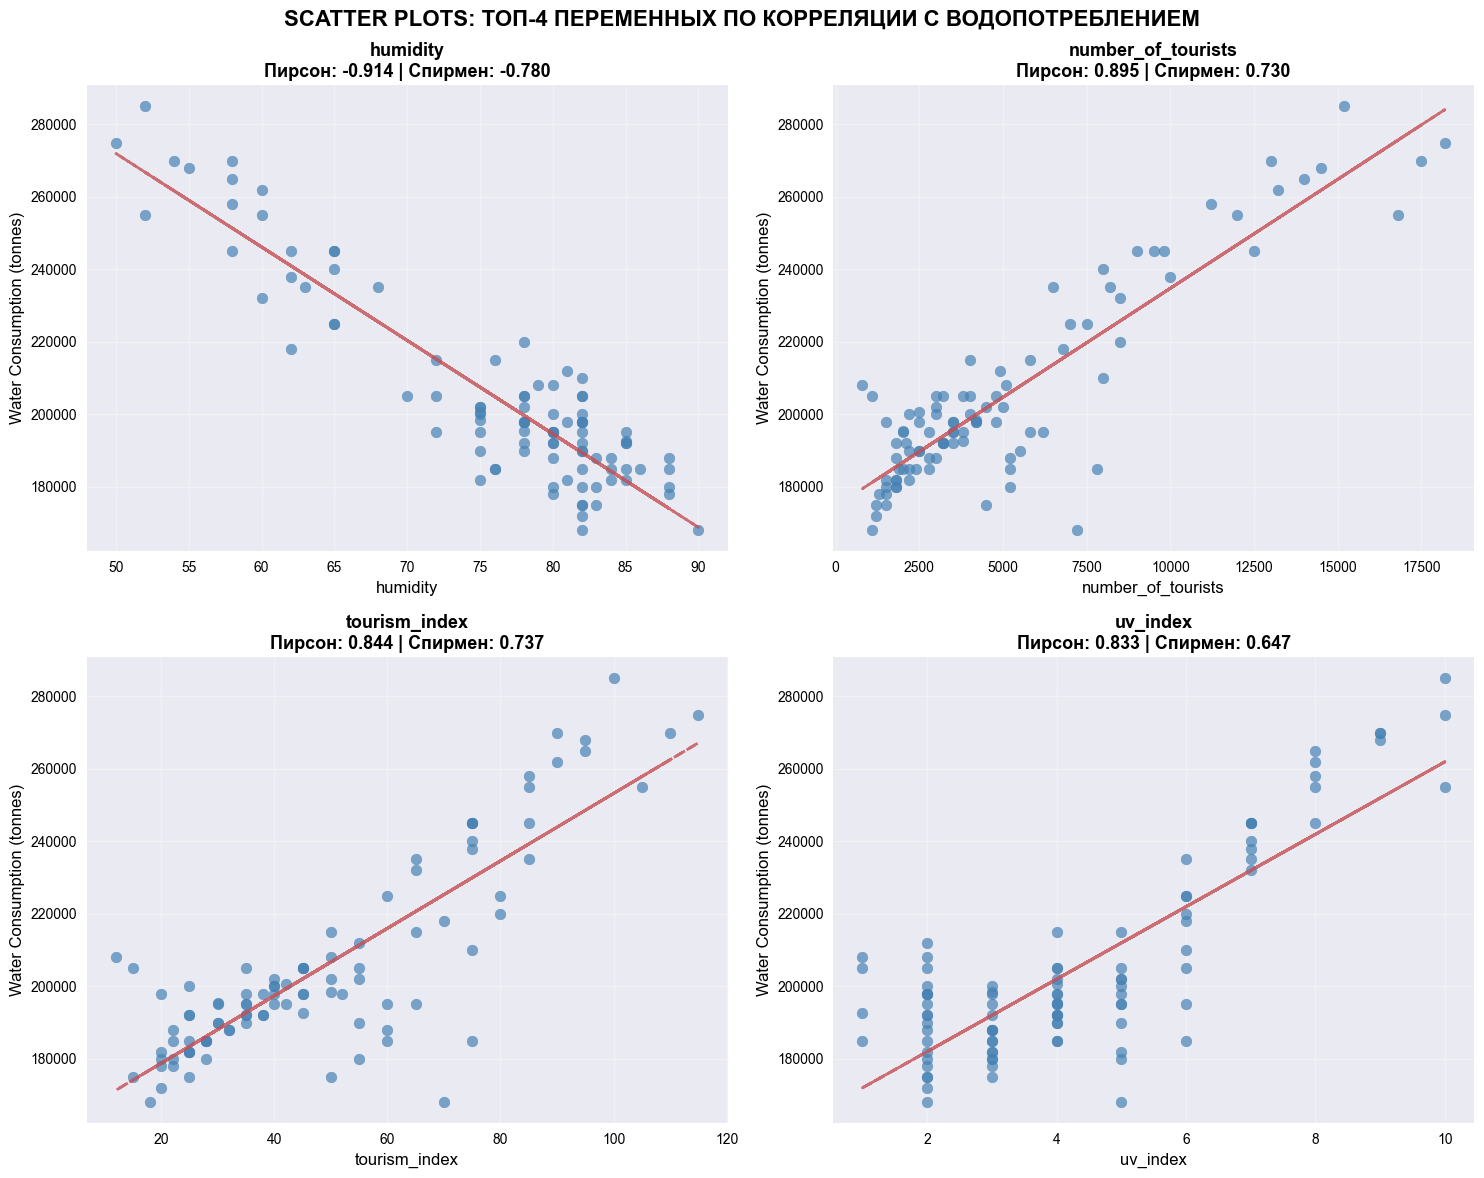


МАТРИЦЫ КОРРЕЛЯЦИИ СОХРАНЕНЫ В ФАЙЛЫ:
📊 correlation_matrix_pearson.csv - матрица корреляции Пирсона
📊 correlation_matrix_spearman.csv - матрица корреляции Спирмена


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Установка черного цвета для всего текста
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'

# Загрузка данных
df = pd.read_csv('Water_Consumption_city_N.csv')

# Выберем числовые колонки для корреляционного анализа
exclude_columns = ['date', 'day_of_week']
numeric_columns = [col for col in df.columns if col not in exclude_columns and pd.api.types.is_numeric_dtype(df[col])]

print(f"Числовые колонки для анализа ({len(numeric_columns)}):")
for i, col in enumerate(numeric_columns, 1):
    print(f"{i:2d}. {col}")

# Создаем матрицы корреляции
correlation_matrix_pearson = df[numeric_columns].corr(method='pearson')
correlation_matrix_spearman = df[numeric_columns].corr(method='spearman')

# Маска для верхнего треугольника
mask = np.triu(np.ones_like(correlation_matrix_pearson, dtype=bool))

# =============================================================================
# МАТРИЦА 1: КОРРЕЛЯЦИЯ ПИРСОНА (ПОЛНАЯ МАТРИЦА)
# =============================================================================
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_pearson, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r', 
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 8, 'color': 'black'})  # Черный текст аннотаций
plt.title('МАТРИЦА КОРРЕЛЯЦИИ ПИРСОНА\n(Линейные зависимости)', 
         fontsize=16, fontweight='bold', pad=20, color='black')
plt.xticks(rotation=45, ha='right', fontsize=10, color='black')
plt.yticks(rotation=0, fontsize=10, color='black')
plt.tight_layout()
plt.show()

# =============================================================================
# МАТРИЦА 2: КОРРЕЛЯЦИЯ СПИРМЕНА (ПОЛНАЯ МАТРИЦА)
# =============================================================================
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_spearman, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r', 
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 8, 'color': 'black'})  # Черный текст аннотаций
plt.title('МАТРИЦА КОРРЕЛЯЦИИ СПИРМЕНА\n(Монотонные зависимости)', 
         fontsize=16, fontweight='bold', pad=20, color='black')
plt.xticks(rotation=45, ha='right', fontsize=10, color='black')
plt.yticks(rotation=0, fontsize=10, color='black')
plt.tight_layout()
plt.show()

# =============================================================================
# МАТРИЦА 3: КОРРЕЛЯЦИЯ ПИРСОНА ТОЛЬКО С ВОДОПОТРЕБЛЕНИЕМ
# =============================================================================
water_corr_pearson = correlation_matrix_pearson['water_consumption_tonnes'].sort_values(ascending=False)

plt.figure(figsize=(12, 10))
colors = ['red' if x < -0.5 else 'orange' if x < -0.3 else 'yellow' if x < 0 else 
          'lightgreen' if x < 0.3 else 'green' if x < 0.5 else 'darkgreen' for x in water_corr_pearson]

bars = plt.barh(range(len(water_corr_pearson)), water_corr_pearson.values, color=colors, alpha=0.8)
plt.yticks(range(len(water_corr_pearson)), water_corr_pearson.index, fontsize=11, color='black')
plt.xlabel('Коэффициент корреляции Пирсона', fontsize=12, color='black')
plt.ylabel('Переменные', fontsize=12, color='black')
plt.title('КОРРЕЛЯЦИЯ ПЕРЕМЕННЫХ С ВОДОПОТРЕБЛЕНИЕМ (Пирсон)', 
         fontsize=14, fontweight='bold', pad=20, color='black')

# Добавляем значения на столбцы
for i, (bar, value) in enumerate(zip(bars, water_corr_pearson.values)):
    plt.text(value + (0.01 if value >= 0 else -0.05), i, f'{value:.3f}', 
             va='center', fontsize=10, color='black')  # Всегда черный текст

plt.grid(axis='x', alpha=0.3)
plt.axvline(x=0, color='black', linewidth=1)
plt.xlim(-1.1, 1.1)
plt.tight_layout()
plt.show()

# =============================================================================
# МАТРИЦА 4: КОРРЕЛЯЦИЯ СПИРМЕНА ТОЛЬКО С ВОДОПОТРЕБЛЕНИЕМ
# =============================================================================
water_corr_spearman = correlation_matrix_spearman['water_consumption_tonnes'].sort_values(ascending=False)

plt.figure(figsize=(12, 10))
colors = ['red' if x < -0.5 else 'orange' if x < -0.3 else 'yellow' if x < 0 else 
          'lightgreen' if x < 0.3 else 'green' if x < 0.5 else 'darkgreen' for x in water_corr_spearman]

bars = plt.barh(range(len(water_corr_spearman)), water_corr_spearman.values, color=colors, alpha=0.8)
plt.yticks(range(len(water_corr_spearman)), water_corr_spearman.index, fontsize=11, color='black')
plt.xlabel('Коэффициент корреляции Спирмена', fontsize=12, color='black')
plt.ylabel('Переменные', fontsize=12, color='black')
plt.title('КОРРЕЛЯЦИЯ ПЕРЕМЕННЫХ С ВОДОПОТРЕБЛЕНИЕМ (Спирмен)', 
         fontsize=14, fontweight='bold', pad=20, color='black')

# Добавляем значения на столбцы
for i, (bar, value) in enumerate(zip(bars, water_corr_spearman.values)):
    plt.text(value + (0.01 if value >= 0 else -0.05), i, f'{value:.3f}', 
             va='center', fontsize=10, color='black')  # Всегда черный текст

plt.grid(axis='x', alpha=0.3)
plt.axvline(x=0, color='black', linewidth=1)
plt.xlim(-1.1, 1.1)
plt.tight_layout()
plt.show()

# =============================================================================
# МАТРИЦА 5: ТОП-10 САМЫХ СИЛЬНЫХ КОРРЕЛЯЦИЙ С ВОДОПОТРЕБЛЕНИЕМ
# =============================================================================
print("\n" + "="*80)
print("ТОП-10 САМЫХ СИЛЬНЫХ КОРРЕЛЯЦИЙ С ВОДОПОТРЕБЛЕНИЕМ")
print("="*80)

# Для Пирсона
print("\n📍 МЕТОД ПИРСОНА (линейная корреляция):")
print("-" * 60)
top_pearson = correlation_matrix_pearson['water_consumption_tonnes'].sort_values(key=abs, ascending=False)
for i, (var, corr) in enumerate(top_pearson.items()):
    if i >= 10:
        break
    strength = "💪 ОЧЕНЬ СИЛЬНАЯ" if abs(corr) > 0.7 else "🔶 СИЛЬНАЯ" if abs(corr) > 0.5 else "🔸 УМЕРЕННАЯ" if abs(corr) > 0.3 else "⚪ СЛАБАЯ"
    direction = "📈 положительная" if corr > 0 else "📉 отрицательная"
    print(f"{i+1:2d}. {var:25} : {corr:7.4f} | {strength} | {direction}")

# Для Спирмена
print("\n📍 МЕТОД СПИРМЕНА (ранговая корреляция):")
print("-" * 60)
top_spearman = correlation_matrix_spearman['water_consumption_tonnes'].sort_values(key=abs, ascending=False)
for i, (var, corr) in enumerate(top_spearman.items()):
    if i >= 10:
        break
    strength = "💪 ОЧЕНЬ СИЛЬНАЯ" if abs(corr) > 0.7 else "🔶 СИЛЬНАЯ" if abs(corr) > 0.5 else "🔸 УМЕРЕННАЯ" if abs(corr) > 0.3 else "⚪ СЛАБАЯ"
    direction = "📈 положительная" if corr > 0 else "📉 отрицательная"
    print(f"{i+1:2d}. {var:25} : {corr:7.4f} | {strength} | {direction}")

# =============================================================================
# МАТРИЦА 6: САМЫЕ СИЛЬНЫЕ КОРРЕЛЯЦИИ МЕЖДУ ПЕРЕМЕННЫМИ
# =============================================================================
print("\n" + "="*80)
print("САМЫЕ СИЛЬНЫЕ КОРРЕЛЯЦИИ МЕЖДУ ПЕРЕМЕННЫМИ (|r| > 0.7)")
print("="*80)

strong_pairs = []
variables = [col for col in numeric_columns if col != 'water_consumption_tonnes']

for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        corr_pearson = correlation_matrix_pearson.loc[variables[i], variables[j]]
        corr_spearman = correlation_matrix_spearman.loc[variables[i], variables[j]]
        if abs(corr_pearson) > 0.7:
            strong_pairs.append((variables[i], variables[j], corr_pearson, corr_spearman))

# Сортировка по силе корреляции Пирсона
strong_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

if strong_pairs:
    for i, (var1, var2, corr_p, corr_s) in enumerate(strong_pairs[:15], 1):
        print(f"{i:2d}. {var1:20} ↔ {var2:20}")
        print(f"     Пирсон: {corr_p:6.3f} | Спирмен: {corr_s:6.3f}")
        print()
else:
    print("Нет сильных корреляций (|r| > 0.7) между переменными")

# =============================================================================
# МАТРИЦА 7: SCATTER PLOTS ДЛЯ ТОП-4 КОРРЕЛЯЦИЙ
# =============================================================================
top_correlated = top_pearson.index[1:5]  # Берем топ-4 (исключая сам water_consumption)

if len(top_correlated) >= 3:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()
    
    for i, var in enumerate(top_correlated[:4]):
        axes[i].scatter(df[var], df['water_consumption_tonnes'], alpha=0.7, s=60, color='steelblue')
        axes[i].set_xlabel(var, fontsize=12, color='black')
        axes[i].set_ylabel('Water Consumption (tonnes)', fontsize=12, color='black')
        
        # Линия тренда
        z = np.polyfit(df[var], df['water_consumption_tonnes'], 1)
        p = np.poly1d(z)
        axes[i].plot(df[var], p(df[var]), "r--", alpha=0.8, linewidth=2)
        
        corr_pearson = correlation_matrix_pearson.loc[var, 'water_consumption_tonnes']
        corr_spearman = correlation_matrix_spearman.loc[var, 'water_consumption_tonnes']
        axes[i].set_title(f'{var}\nПирсон: {corr_pearson:.3f} | Спирмен: {corr_spearman:.3f}', 
                         fontsize=13, fontweight='bold', color='black')
        
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(colors='black')
    
    plt.suptitle('SCATTER PLOTS: ТОП-4 ПЕРЕМЕННЫХ ПО КОРРЕЛЯЦИИ С ВОДОПОТРЕБЛЕНИЕМ', 
                fontsize=16, fontweight='bold', y=0.98, color='black')
    plt.tight_layout()
    plt.show()

СКОЛЬЗЯЩЕЕ СРЕДНЕЕ

C:\Users\user\AppData\Local\Temp\ipykernel_7184\933689735.py:97: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(pad=4.0)
C:\Users\user\AppData\Local\Temp\ipykernel_7184\933689735.py:97: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(pad=4.0)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


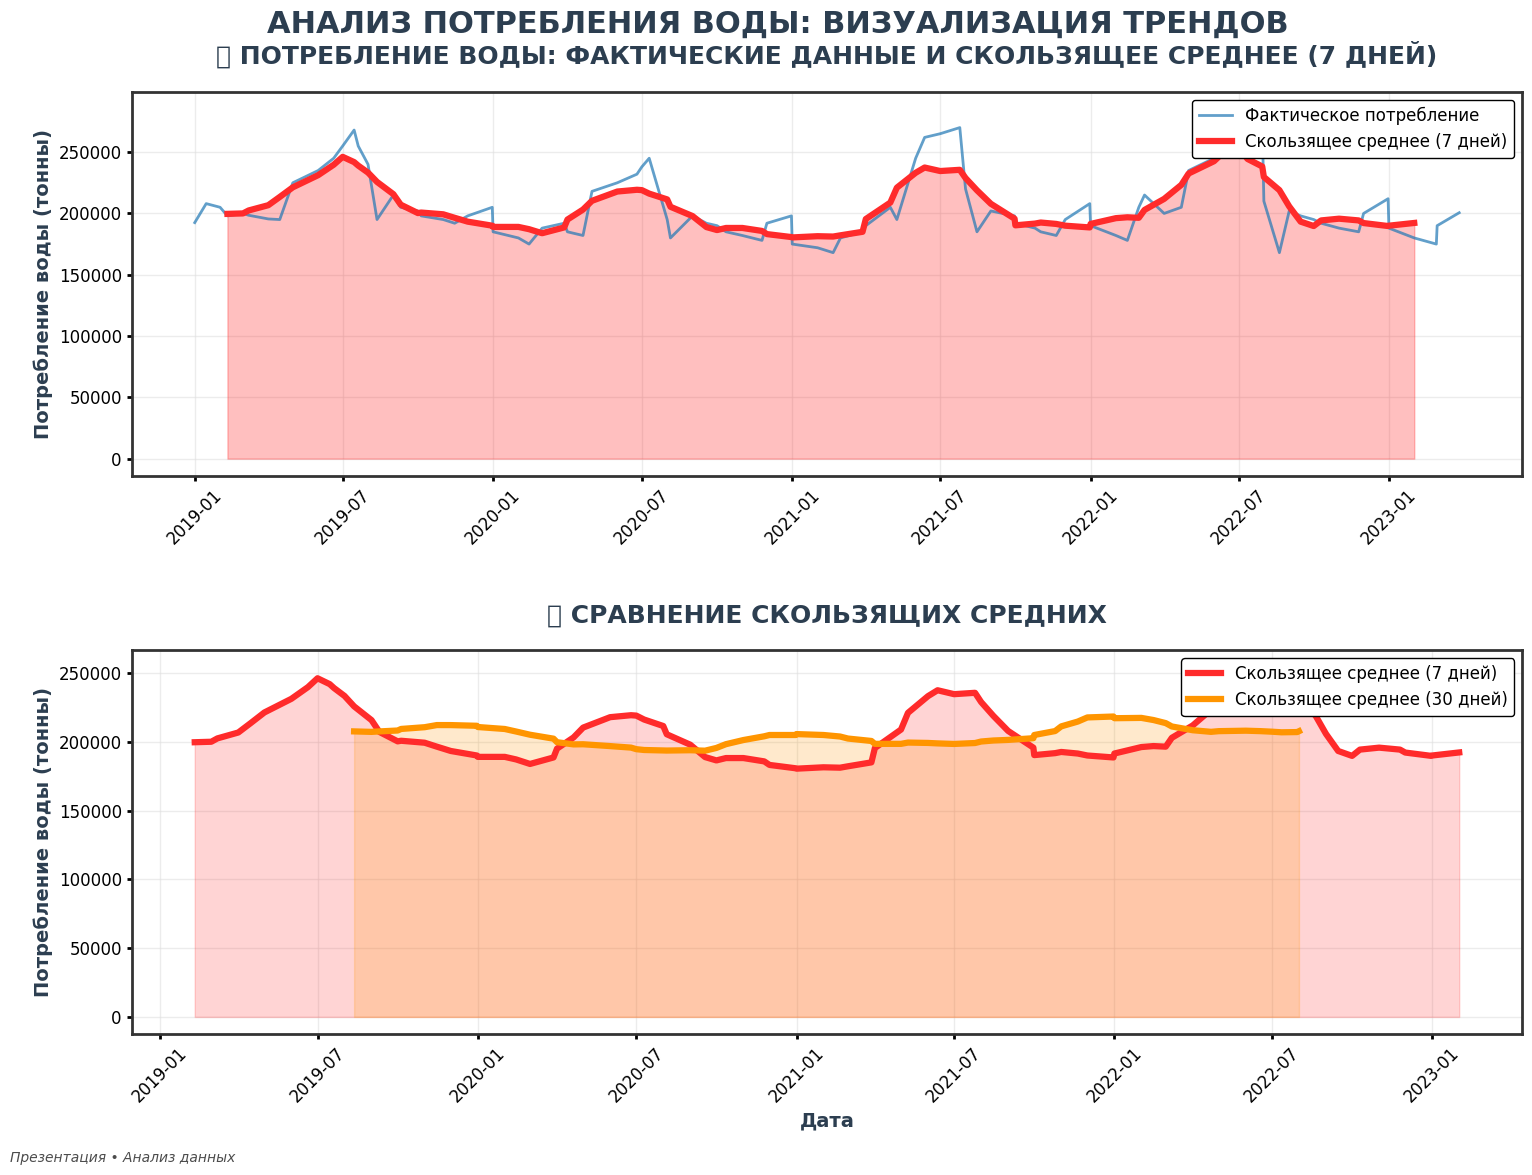

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
КЛЮЧЕВЫЕ СТАТИСТИЧЕСКИЕ ПОКАЗАТЕЛИ
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯

📊 7-ДНЕВНОЕ СКОЛЬЗЯЩЕЕ СРЕДНЕЕ:
----------------------------------------
   Среднее: 206436 тонн
   Максимум: 254000 тонн
   Минимум: 180429 тонн
   Волатильность: 19726 тонн

📊 30-ДНЕВНОЕ СКОЛЬЗЯЩЕЕ СРЕДНЕЕ:
----------------------------------------
   Среднее: 204660 тонн
   Максимум: 218333 тонн
   Минимум: 193500 тонн
   Волатильность: 6592 тонн

✅✅✅✅✅✅✅✅✅✅
ВЫВОД: 30-дневное скользящее среднее показывает более сглаженный тренд
и меньшую волатильность по сравнению с 7-дневным
✅✅✅✅✅✅✅✅✅✅


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных
df = pd.read_csv('Water_Consumption_city_N.csv')

# Преобразование даты в datetime формат
df['date'] = pd.to_datetime(df['date'])

# Сортировка по дате
df = df.sort_values('date')

# Вычисление скользящего среднего за 7 дней
df['water_consumption_7d_ma'] = df['water_consumption_tonnes'].rolling(window=7, center=True).mean()

# Вычисление скользящего среднего за 30 дней
df['water_consumption_30d_ma'] = df['water_consumption_tonnes'].rolling(window=30, center=True).mean()

# Настройка стиля для презентации
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# ЯРКАЯ ЦВЕТОВАЯ ПАЛИТРА ДЛЯ ПРЕЗЕНТАЦИИ
colors = {
    'actual': '#1F77B4',      # Яркий синий
    'ma_7d': '#FF2B2B',       # Ярко-красный
    'ma_30d': '#FF9500',      # Ярко-оранжевый
    'background': '#FFFFFF',   # Белый фон
    'grid': '#E0E0E0'         # Светло-серая сетка
}

# ГРАФИК 1: Исходные данные и скользящее среднее за 7 дней
# Основной график с увеличенной толщиной линий
ax1.plot(df['date'], df['water_consumption_tonnes'], 
         label='Фактическое потребление', alpha=0.7, linewidth=2, 
         color=colors['actual'], zorder=3)

ax1.plot(df['date'], df['water_consumption_7d_ma'], 
         label='Скользящее среднее (7 дней)', linewidth=4.5, 
         color=colors['ma_7d'], zorder=4)

# Яркая заливка под скользящим средним
ax1.fill_between(df['date'], df['water_consumption_7d_ma'], 
                 alpha=0.3, color=colors['ma_7d'], zorder=2)

# Настройка внешнего вида
ax1.set_title('📊 ПОТРЕБЛЕНИЕ ВОДЫ: ФАКТИЧЕСКИЕ ДАННЫЕ И СКОЛЬЗЯЩЕЕ СРЕДНЕЕ (7 ДНЕЙ)', 
              fontsize=18, fontweight='bold', pad=20, color='#2C3E50')
ax1.set_ylabel('Потребление воды (тонны)', fontsize=14, fontweight='bold', color='#2C3E50')
ax1.legend(fontsize=12, framealpha=1, loc='upper right', 
           facecolor='white', edgecolor='black', frameon=True)

# Улучшенная сетка
ax1.grid(True, alpha=0.6, color=colors['grid'], linestyle='-', linewidth=1)
ax1.set_facecolor(colors['background'])

# ГРАФИК 2: Сравнение скользящих средних
ax2.plot(df['date'], df['water_consumption_7d_ma'], 
         label='Скользящее среднее (7 дней)', linewidth=4.5,
         color=colors['ma_7d'], zorder=4)

ax2.plot(df['date'], df['water_consumption_30d_ma'], 
         label='Скользящее среднее (30 дней)', linewidth=4.5,
         color=colors['ma_30d'], zorder=4)

# Яркая заливка для обоих скользящих средних
ax2.fill_between(df['date'], df['water_consumption_7d_ma'], 
                 alpha=0.2, color=colors['ma_7d'], zorder=2)
ax2.fill_between(df['date'], df['water_consumption_30d_ma'], 
                 alpha=0.2, color=colors['ma_30d'], zorder=2)

ax2.set_title('📈 СРАВНЕНИЕ СКОЛЬЗЯЩИХ СРЕДНИХ', 
              fontsize=18, fontweight='bold', pad=20, color='#2C3E50')
ax2.set_xlabel('Дата', fontsize=14, fontweight='bold', color='#2C3E50')
ax2.set_ylabel('Потребление воды (тонны)', fontsize=14, fontweight='bold', color='#2C3E50')
ax2.legend(fontsize=12, framealpha=1, loc='upper right',
           facecolor='white', edgecolor='black', frameon=True)

# Улучшенная сетка и фон
ax2.grid(True, alpha=0.6, color=colors['grid'], linestyle='-', linewidth=1)
ax2.set_facecolor(colors['background'])

# ОБЩИЕ НАСТРОЙКИ ДЛЯ ОБОИХ ГРАФИКОВ
for ax in [ax1, ax2]:
    # Жирные подписи осей
    ax.tick_params(axis='both', which='major', labelsize=12, width=2)
    ax.tick_params(axis='x', rotation=45)
    
    # Темные рамки
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        spine.set_color('#333333')

# Улучшенное расположение
plt.tight_layout(pad=4.0)

# ОБЩИЙ ЗАГОЛОВОК ДЛЯ ПРЕЗЕНТАЦИИ
fig.suptitle('АНАЛИЗ ПОТРЕБЛЕНИЯ ВОДЫ: ВИЗУАЛИЗАЦИЯ ТРЕНДОВ', 
             fontsize=22, fontweight='bold', color='#2C3E50', y=0.98)

# Добавляем логотип или водяной знак (опционально)
fig.text(0.02, 0.02, 'Презентация • Анализ данных', 
         fontsize=10, style='italic', alpha=0.7)

plt.show()

# ЯРКИЙ СТАТИСТИЧЕСКИЙ ВЫВОД ДЛЯ ПРЕЗЕНТАЦИИ
print("🎯" * 10)
print("КЛЮЧЕВЫЕ СТАТИСТИЧЕСКИЕ ПОКАЗАТЕЛИ")
print("🎯" * 10)

stats_data = {
    '7-дневное скользящее среднее': {
        'Среднее': df['water_consumption_7d_ma'].mean(),
        'Максимум': df['water_consumption_7d_ma'].max(),
        'Минимум': df['water_consumption_7d_ma'].min(),
        'Волатильность': df['water_consumption_7d_ma'].std()
    },
    '30-дневное скользящее среднее': {
        'Среднее': df['water_consumption_30d_ma'].mean(),
        'Максимум': df['water_consumption_30d_ma'].max(),
        'Минимум': df['water_consumption_30d_ma'].min(),
        'Волатильность': df['water_consumption_30d_ma'].std()
    }
}

for indicator, values in stats_data.items():
    print(f"\n📊 {indicator.upper()}:")
    print("-" * 40)
    for metric, value in values.items():
        print(f"   {metric}: {value:.0f} тонн")

print("\n" + "✅" * 10)
print("ВЫВОД: 30-дневное скользящее среднее показывает более сглаженный тренд")
print("и меньшую волатильность по сравнению с 7-дневным")
print("✅" * 10)

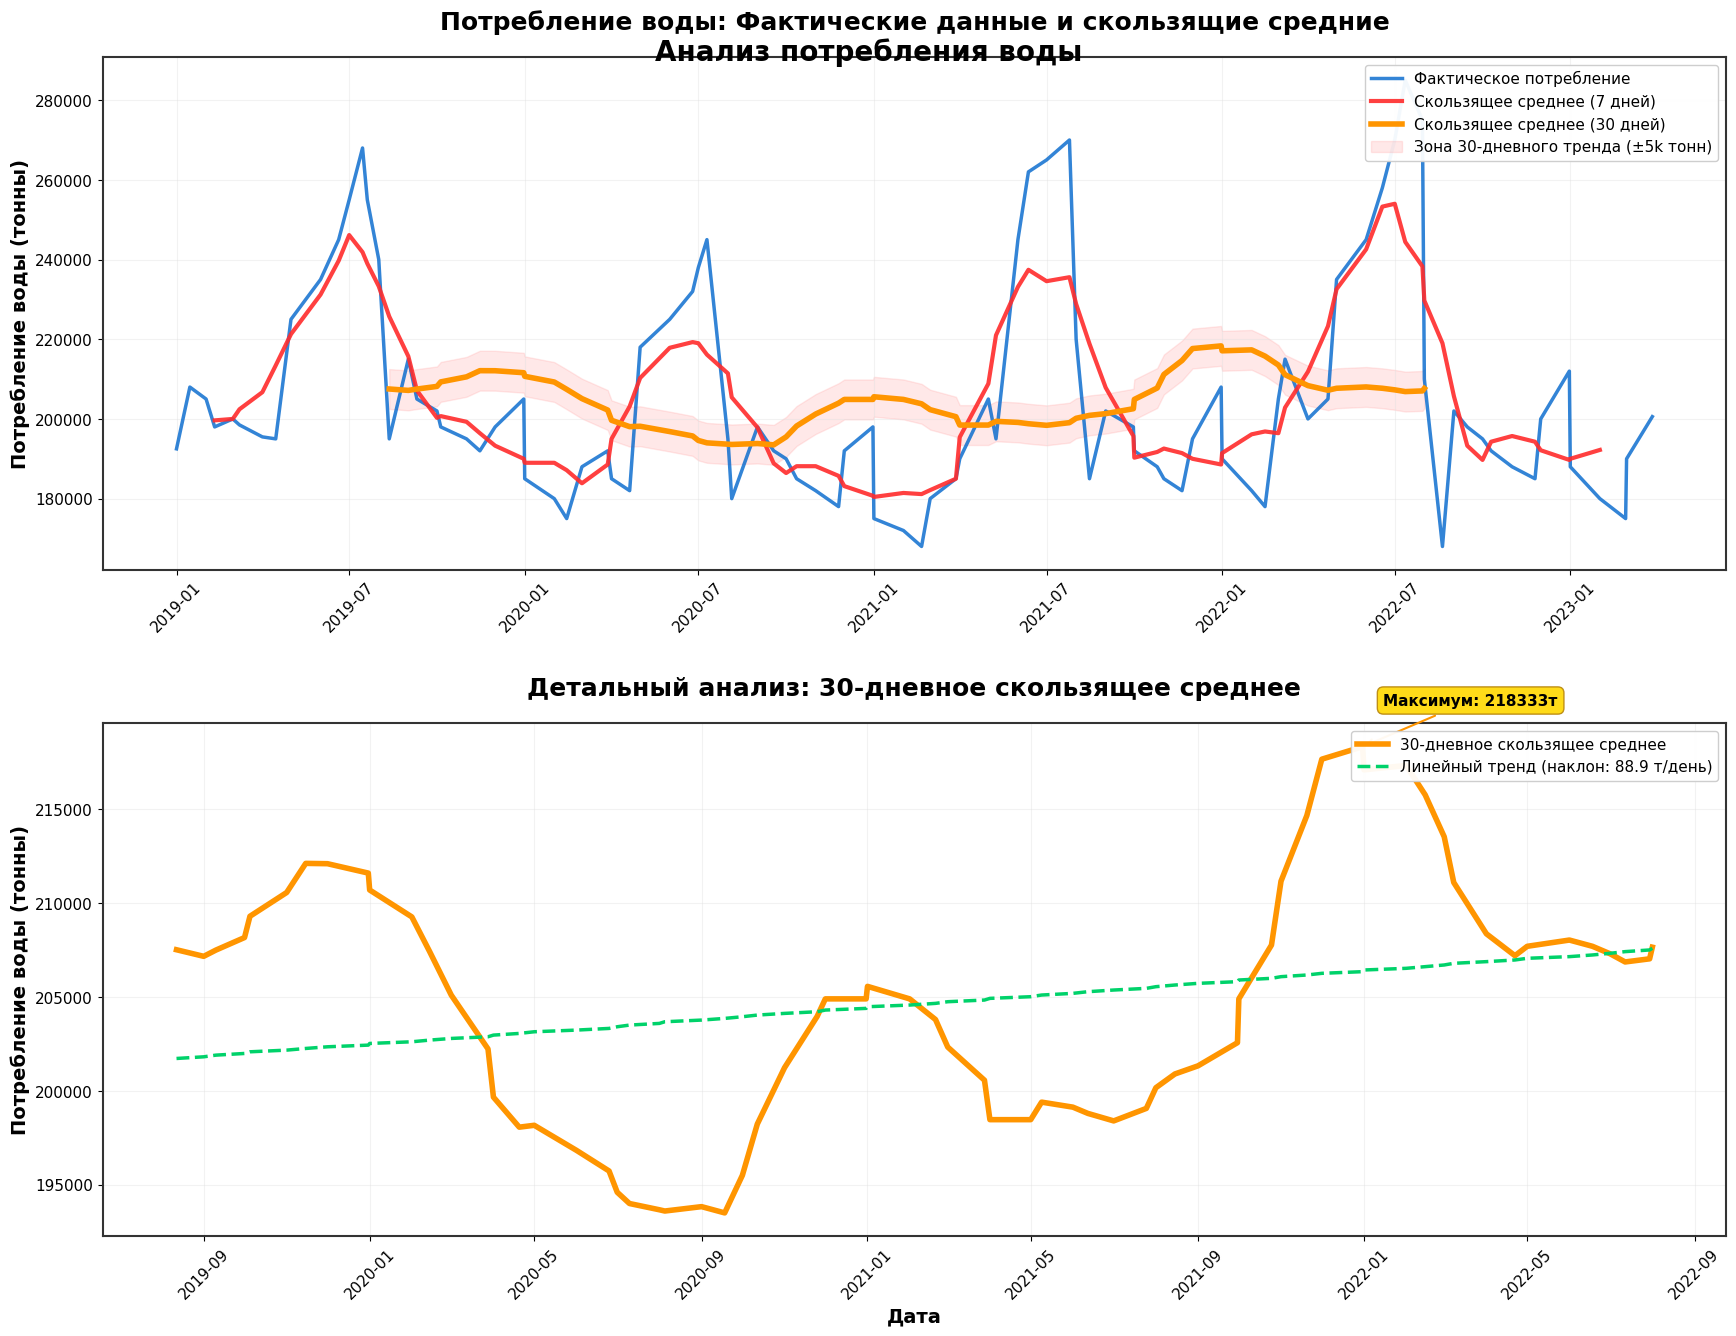

СТАТИСТИЧЕСКИЙ АНАЛИЗ

ОБЩАЯ СТАТИСТИКА:
• Период данных: 01.01.2019 - 28.03.2023
• Среднее потребление: 205720 тонн
• Минимальное потребление: 168000 тонн
• Максимальное потребление: 285000 тонн

7-ДНЕВНОЕ СКОЛЬЗЯЩЕЕ СРЕДНЕЕ:
• Среднее значение: 206436 тонн
• Стандартное отклонение: 19726 тонн

30-ДНЕВНОЕ СКОЛЬЗЯЩЕЕ СРЕДНЕЕ:
• Среднее значение: 204660 тонн
• Стандартное отклонение: 6592 тонн
• Тренд: рост (88.9 тонн/день)



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных
df = pd.read_csv('Water_Consumption_city_N.csv')

# Преобразование даты в datetime формат
df['date'] = pd.to_datetime(df['date'])

# Сортировка по дате
df = df.sort_values('date')

# Вычисление скользящих средних
df['water_consumption_7d_ma'] = df['water_consumption_tonnes'].rolling(window=7, center=True).mean()
df['water_consumption_30d_ma'] = df['water_consumption_tonnes'].rolling(window=30, center=True).mean()

# ЯРКАЯ ЦВЕТОВАЯ ПАЛИТРА ДЛЯ ПРЕЗЕНТАЦИИ
PRESENTATION_COLORS = {
    'actual': '#0066CC',      # ЯРКИЙ СИНИЙ для фактического потребления
    'ma_7d': '#FF2B2B',       # Ярко-красный
    'ma_30d': '#FF9500',      # Ярко-оранжевый
    'trend': '#00D26A',       # Ярко-зеленый для тренда
    'highlight': '#FFD700',   # Золотой для выделения
    'zone': '#FF6B6B',        # Красный для зоны
    'background': '#FFFFFF',   # Белый фон
    'grid': '#E0E0E0'         # Светло-серая сетка
}

# Настройка стиля для презентации
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 14))

# ГРАФИК 1: Основной график с УСИЛЕННОЙ СИНЕЙ ЛИНИЕЙ ФАКТИЧЕСКОГО ПОТРЕБЛЕНИЯ
# Фактические данные - ЯРКАЯ СИНЯЯ И ЖИРНАЯ ЛИНИЯ
ax1.plot(df['date'], df['water_consumption_tonnes'], 
         label='Фактическое потребление', 
         color=PRESENTATION_COLORS['actual'], linewidth=2.5, alpha=0.8)

# Скользящие средние - ЯРКИЕ И ТОЛСТЫЕ ЛИНИИ
ax1.plot(df['date'], df['water_consumption_7d_ma'], 
         label='Скользящее среднее (7 дней)', 
         color=PRESENTATION_COLORS['ma_7d'], linewidth=3, alpha=0.9)

ax1.plot(df['date'], df['water_consumption_30d_ma'], 
         label='Скользящее среднее (30 дней)', 
         color=PRESENTATION_COLORS['ma_30d'], linewidth=4, alpha=1)

# ЯРКАЯ ЗАЛИВКА ВОКРУГ 30-ДНЕВНОГО СРЕДНЕГО (упрощенная)
ax1.fill_between(df['date'], 
                df['water_consumption_30d_ma'] - 5000, 
                df['water_consumption_30d_ma'] + 5000, 
                alpha=0.15, color=PRESENTATION_COLORS['zone'], 
                label='Зона 30-дневного тренда (±5k тонн)')

# ПРЕЗЕНТАЦИОННОЕ ОФОРМЛЕНИЕ ПЕРВОГО ГРАФИКА
ax1.set_title('Потребление воды: Фактические данные и скользящие средние', 
              fontsize=18, fontweight='bold', pad=20)
ax1.set_ylabel('Потребление воды (тонны)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11, framealpha=0.95, loc='upper right')
ax1.grid(True, alpha=0.4, color=PRESENTATION_COLORS['grid'], linestyle='-')
ax1.set_facecolor(PRESENTATION_COLORS['background'])

# Автоматическое определение границ оси Y для лучшего отображения
data_min = df['water_consumption_tonnes'].min()
data_max = df['water_consumption_tonnes'].max()
margin = (data_max - data_min) * 0.05
ax1.set_ylim(data_min - margin, data_max + margin)

# ГРАФИК 2: Детальный анализ с КОНТРАСТНЫМИ ЦВЕТАМИ (упрощенный)
# Основная линия - яркая и толстая
ax2.plot(df['date'], df['water_consumption_30d_ma'], 
         label='30-дневное скользящее среднее', 
         color=PRESENTATION_COLORS['ma_30d'], linewidth=4)

# УПРОЩЕННЫЕ АННОТАЦИИ - только для абсолютного максимума
if not df['water_consumption_30d_ma'].isna().all():
    max_point = df.loc[df['water_consumption_30d_ma'].idxmax()]
    ax2.annotate(f'Максимум: {max_point["water_consumption_30d_ma"]:.0f}т', 
                xy=(max_point['date'], max_point['water_consumption_30d_ma']),
                xytext=(15, 30), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.4', 
                         facecolor=PRESENTATION_COLORS['highlight'], 
                         alpha=0.9, edgecolor='#B8860B', linewidth=1),
                fontsize=11, fontweight='bold',
                arrowprops=dict(arrowstyle='->', 
                              color=PRESENTATION_COLORS['ma_30d'], 
                              lw=1.5))

# ТРЕНДОВАЯ ЛИНИЯ - только если есть достаточно данных
valid_ma_data = df.dropna(subset=['water_consumption_30d_ma'])
if len(valid_ma_data) > 10:  # Минимум 10 точек для тренда
    x_numeric = np.arange(len(valid_ma_data))
    z = np.polyfit(x_numeric, valid_ma_data['water_consumption_30d_ma'], 1)
    p = np.poly1d(z)
    ax2.plot(valid_ma_data['date'], p(x_numeric), "--", 
             color=PRESENTATION_COLORS['trend'], linewidth=2.5, 
             label=f'Линейный тренд (наклон: {z[0]:.1f} т/день)')

# ПРЕЗЕНТАЦИОННОЕ ОФОРМЛЕНИЕ ВТОРОГО ГРАФИКА
ax2.set_title('Детальный анализ: 30-дневное скользящее среднее', 
              fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Дата', fontsize=14, fontweight='bold')
ax2.set_ylabel('Потребление воды (тонны)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11, framealpha=0.95, loc='upper right')
ax2.grid(True, alpha=0.4, color=PRESENTATION_COLORS['grid'], linestyle='-')
ax2.set_facecolor(PRESENTATION_COLORS['background'])

# Автоматическое масштабирование для второго графика
if not df['water_consumption_30d_ma'].isna().all():
    ma_min = df['water_consumption_30d_ma'].min()
    ma_max = df['water_consumption_30d_ma'].max()
    ma_margin = (ma_max - ma_min) * 0.05
    ax2.set_ylim(ma_min - ma_margin, ma_max + ma_margin)

# ОБЩИЕ НАСТРОЙКИ ДЛЯ ОБОИХ ГРАФИКОВ
for ax in [ax1, ax2]:
    # Жирные подписи осей
    ax.tick_params(axis='both', which='major', labelsize=11)
    ax.tick_params(axis='x', rotation=45)
    
    # Темные рамки
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
        spine.set_color('#333333')

# УЛУЧШЕННОЕ РАСПОЛОЖЕНИЕ
plt.tight_layout(pad=3.0)

# ЧИСТЫЙ ЗАГОЛОВОК БЕЗ ЛИШНИХ ЭЛЕМЕНТОВ
fig.suptitle('Анализ потребления воды', 
             fontsize=20, fontweight='bold', y=0.95)

plt.show()

# УПРОЩЕННЫЙ СТАТИСТИЧЕСКИЙ ВЫВОД
print("=" * 10)
print("СТАТИСТИЧЕСКИЙ АНАЛИЗ")
print("=" * 10)

# Базовая статистика
print(f"\nОБЩАЯ СТАТИСТИКА:")
print(f"• Период данных: {df['date'].min().strftime('%d.%m.%Y')} - {df['date'].max().strftime('%d.%m.%Y')}")
print(f"• Среднее потребление: {df['water_consumption_tonnes'].mean():.0f} тонн")
print(f"• Минимальное потребление: {df['water_consumption_tonnes'].min():.0f} тонн")
print(f"• Максимальное потребление: {df['water_consumption_tonnes'].max():.0f} тонн")

# Статистика скользящих средних
if not df['water_consumption_7d_ma'].isna().all():
    print(f"\n7-ДНЕВНОЕ СКОЛЬЗЯЩЕЕ СРЕДНЕЕ:")
    ma_7d = df['water_consumption_7d_ma'].dropna()
    print(f"• Среднее значение: {ma_7d.mean():.0f} тонн")
    print(f"• Стандартное отклонение: {ma_7d.std():.0f} тонн")

if not df['water_consumption_30d_ma'].isna().all():
    print(f"\n30-ДНЕВНОЕ СКОЛЬЗЯЩЕЕ СРЕДНЕЕ:")
    ma_30d = df['water_consumption_30d_ma'].dropna()
    print(f"• Среднее значение: {ma_30d.mean():.0f} тонн")
    print(f"• Стандартное отклонение: {ma_30d.std():.0f} тонн")
    
    # Анализ тренда
    if len(valid_ma_data) > 10:
        trend_direction = "рост" if z[0] > 0 else "снижение" if z[0] < 0 else "стабильность"
        print(f"• Тренд: {trend_direction} ({abs(z[0]):.1f} тонн/день)")

print("\n" + "=" * 10)